# IMPORT LIBRARIES/DATASETS

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

In [31]:
with open("./train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [32]:
X_train,y_train=train['features'],train['labels']
X_test,y_test=test['features'],test['labels']
X_valid,y_valid=valid['features'],valid['labels']

In [33]:
X_train.shape

(34799, 32, 32, 3)

In [34]:
y_train.shape

(34799,)

 # IMAGES VISUALIZATION

31

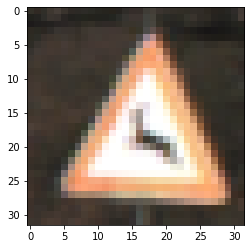

In [35]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

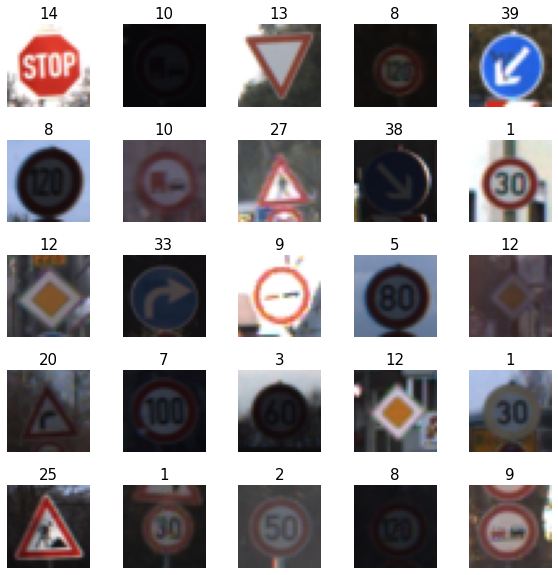

In [36]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0,W_grid*L_grid):
    # Select a random number
    index = np.random.randint(0,n_training)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index],fontsize = 15)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

        

 # CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [39]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [40]:
X_train_gray = np.sum(X_train/3,axis = 3,keepdims = True)
X_test_gray = np.sum(X_test/3,axis = 3,keepdims = True)
X_valid_gray = np.sum(X_valid/3,axis = 3,keepdims = True)

In [41]:
X_train_gray.shape

(34799, 32, 32, 1)

In [42]:
X_train_gray_norm = (X_train_gray-128)/128
X_test_gray_norm = (X_test_gray-128)/128
X_valid_gray_norm = (X_valid_gray-128)/128

In [43]:
X_train_gray_norm

array([[[[-0.11197917],
         [-0.078125  ],
         [-0.03385417],
         ...,
         [-0.90885417],
         [-0.90364583],
         [-0.8984375 ]],

        [[-0.17447917],
         [-0.09114583],
         [-0.03645833],
         ...,
         [-0.90885417],
         [-0.89322917],
         [-0.8359375 ]],

        [[-0.15364583],
         [ 0.        ],
         [ 0.04427083],
         ...,
         [-0.90625   ],
         [-0.86197917],
         [-0.6875    ]],

        ...,

        [[-0.10677083],
         [-0.14322917],
         [-0.1640625 ],
         ...,
         [-0.86458333],
         [-0.86197917],
         [-0.86197917]],

        [[-0.17447917],
         [-0.16927083],
         [-0.1640625 ],
         ...,
         [-0.8671875 ],
         [-0.86458333],
         [-0.86979167]],

        [[-0.31510417],
         [-0.30208333],
         [-0.27604167],
         ...,
         [-0.86458333],
         [-0.86458333],
         [-0.86458333]]],


       [[[-0.85416667],


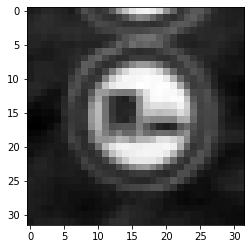

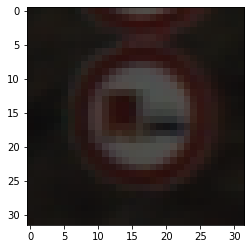

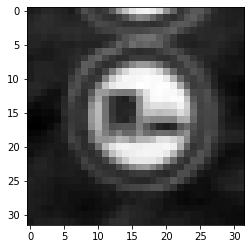

In [13]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

# TASK #5: UNDERSTAND THE THEORY AND INTUITION BEHIND CONVOLUTIONAL NEURAL NETWORKS 

# TASK #6: BUILD DEEP CONVOLUTIONAL NEURAL NETWORK MODEL

In [14]:
from tensorflow.keras import datasets, layers, models
CNN = models.Sequential()

CNN.add(layers.Conv2D(6,(5,5),activation = 'relu',input_shape = (32,32,1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16,(5,5),activation = 'relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120,activation = 'relu'))
CNN.add(layers.Dense(84,activation = 'relu'))
CNN.add(layers.Dense(43,activation = 'softmax'))
CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               4

 # COMPILE AND TRAIN DEEP CNN MODEL

In [15]:
CNN.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [25]:
history = CNN.fit(X_train_gray_norm,
                 y_train,
                 batch_size = 500,
                 epochs = 5,
                 verbose = 1,
                 validation_data = (X_valid_gray_norm,y_valid))

Train on 34799 samples, validate on 4410 samples
Epoch 1/5
34799/34799 [==============================] - 14s 404us/sample - loss: 0.1667 - accuracy: 0.9516 - val_loss: 0.4397 - val_accuracy: 0.8916
Epoch 2/5
34799/34799 [==============================] - 14s 403us/sample - loss: 0.1531 - accuracy: 0.9569 - val_loss: 0.4216 - val_accuracy: 0.8961
Epoch 3/5
34799/34799 [==============================] - 14s 404us/sample - loss: 0.1426 - accuracy: 0.9604 - val_loss: 0.4287 - val_accuracy: 0.8934
Epoch 4/5
34799/34799 [==============================] - 14s 406us/sample - loss: 0.1331 - accuracy: 0.9626 - val_loss: 0.4252 - val_accuracy: 0.8912
Epoch 5/5
34799/34799 [==============================] - 14s 405us/sample - loss: 0.1282 - accuracy: 0.9648 - val_loss: 0.4208 - val_accuracy: 0.8982


In [26]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

12630/12630 [==============================] - 3s 239us/sample - loss: 0.6674 - accuracy: 0.8831
Test Accuracy: 0.8830562233924866


In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [28]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

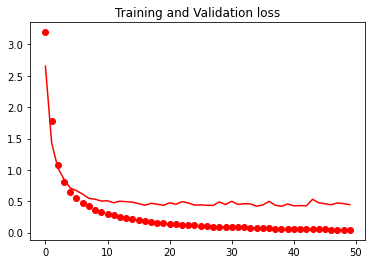

In [32]:
epochs = range(len(accuracy))
plt.plot(epochs,loss,'ro',label = 'Training loss')
plt.plot(epochs,val_loss,'r',label = 'Validation loss')
plt.title ('Training and Validation loss')

Text(0.5, 1.0, 'Training and Validation accuracy')

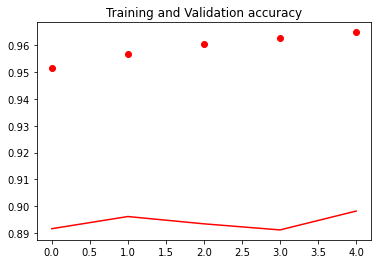

In [29]:
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'ro',label = 'Training accuracy')
plt.plot(epochs,val_accuracy,'r',label = 'Validation accuracy')
plt.title ('Training and Validation accuracy')

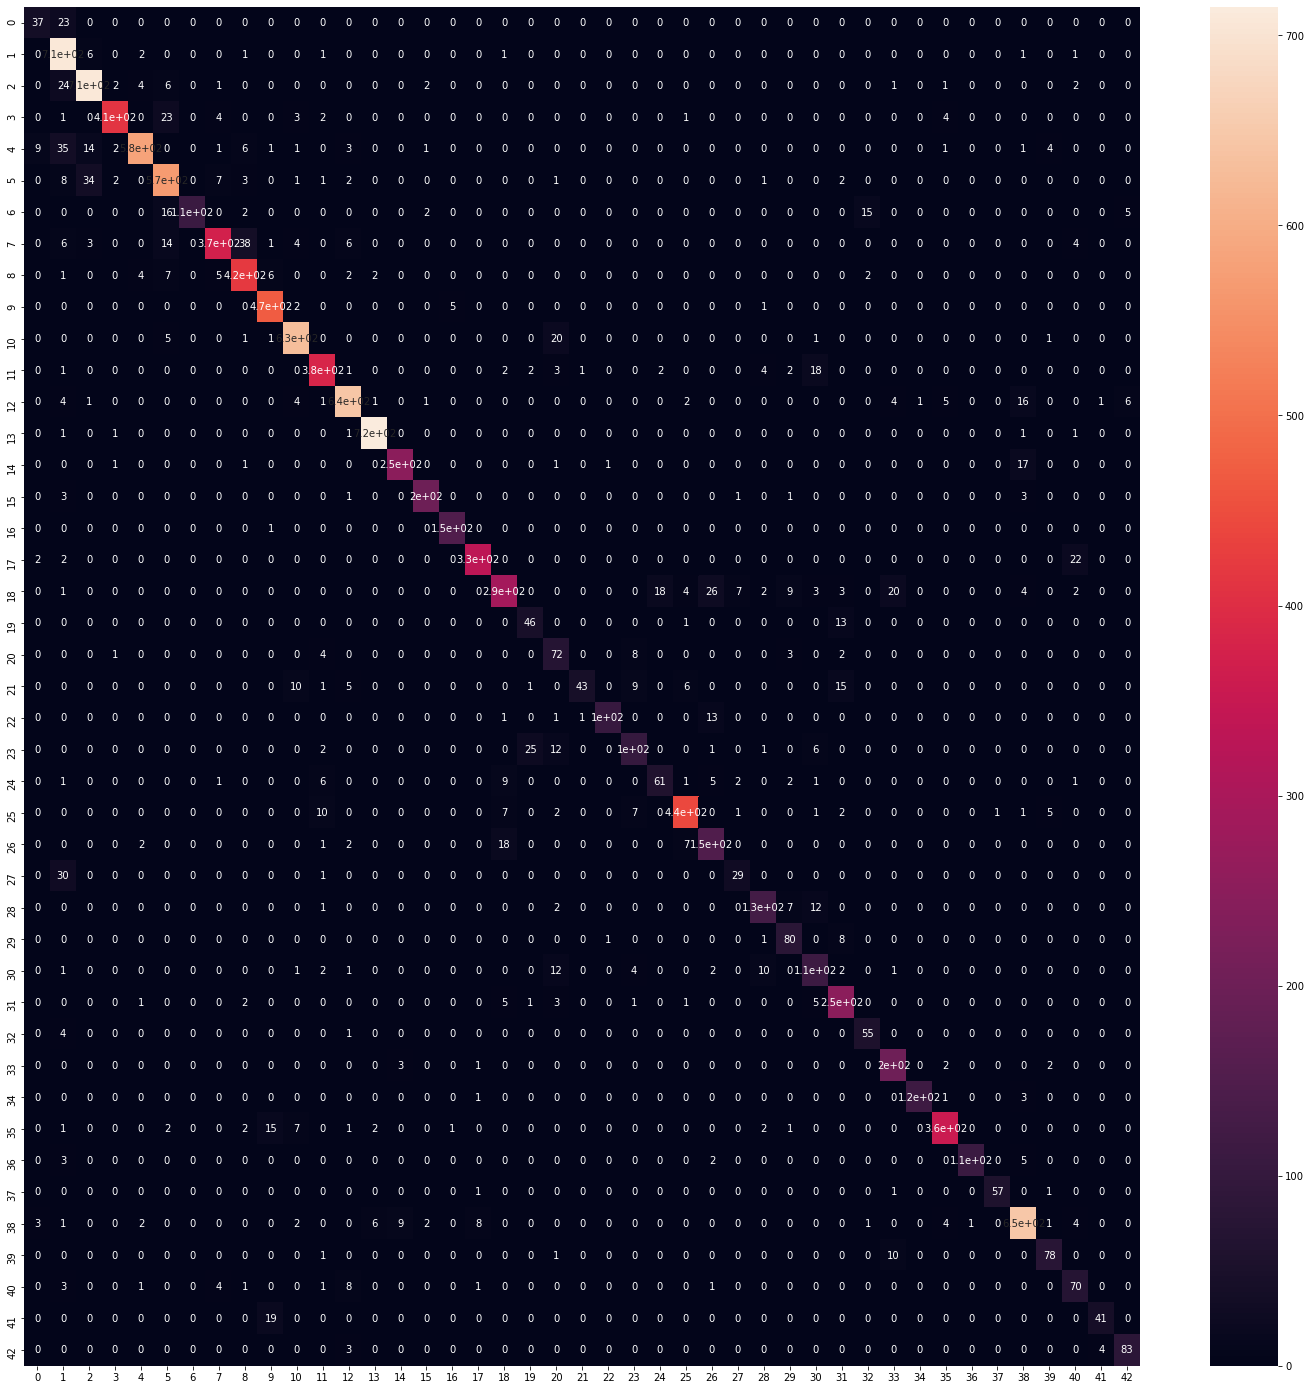

In [37]:
predicted_classes = CNN.predict_classes(X_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

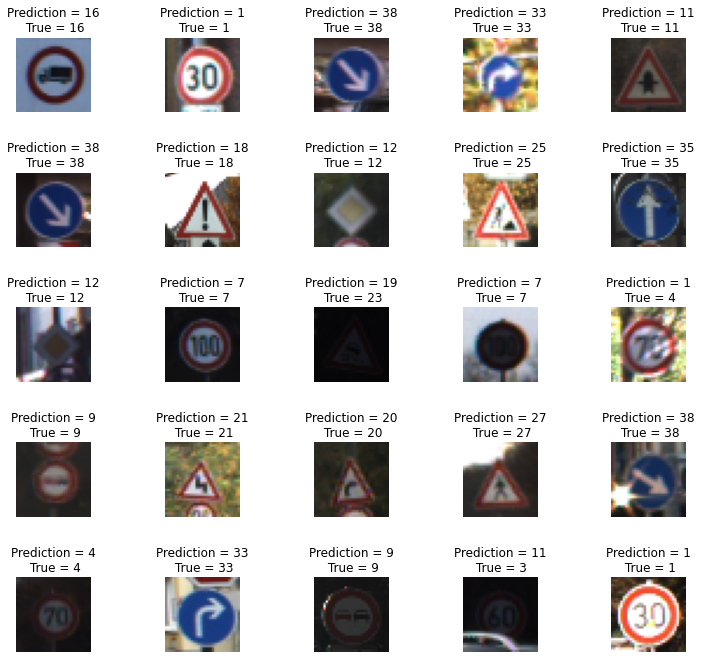

In [38]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

# APPENDIX

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons
